<a href="https://colab.research.google.com/github/Exoper/ML_Dwarka_June19/blob/master/Pokemon_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pokemon - Classifier

In [0]:
import os

In [3]:
from pathlib import Path
from google.colab import drive
import keras
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Accessing dataset from Drive

In [4]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls "/content/gdrive/My Drive"

### Unzip the dataset file 

In [0]:
!unzip -q "/content/gdrive/My Drive/Pokemon_Classifier/Pokemon_Dataset.zip"

In [7]:
!ls

gdrive	Pokemon-Dataset  sample_data


## Creating a Dataset for the model

In [0]:
p = Path('Pokemon-Dataset/')

In [9]:
files = p.glob('*')

image_data = []
image_label = []

label_dict = {'Squirtle':0,'Spearow':1,'Psyduck':2,'Charmander':3 , 'Bulbasaur':4 , 'Pikachu':5 , 'Arcanine':6,'Mewtwo':7, 'Onix':8 , 'Poliwhirl':9}
label_to_name = {0:'Squirtle',1:'Spearow',2:'Psyduck',3:'Charmander',4:'Bulbasaur',5:'Pikachu',6:'Arcanine',7:'Mewtwo',8:'Onix',9:'Poliwhirl'}
for f in files:
    label = str(f).split('/')[-1]
    
    cnt = 0
    
    print(f)
    
    for image_path in f.glob('*.jpg'):
        img = image.load_img(image_path , target_size=(96,96))
        
        image_array = image.img_to_array(img)
        
        image_data.append(image_array)
        
        image_label.append(label_dict[label])
        
        cnt +=1
        
    print(cnt)

Pokemon-Dataset/Squirtle
186
Pokemon-Dataset/Bulbasaur
174
Pokemon-Dataset/Charmander
200
Pokemon-Dataset/Mewtwo
192
Pokemon-Dataset/Pikachu
199
Pokemon-Dataset/Spearow
130
Pokemon-Dataset/Poliwhirl
63
Pokemon-Dataset/Onix
64
Pokemon-Dataset/Arcanine
61
Pokemon-Dataset/Psyduck
158


In [10]:
len(image_data) , len(image_label)

(1427, 1427)

In [0]:
X = np.array(image_data , dtype = 'float32')
y =np.array(image_label)

In [12]:
X.shape , y.shape

((1427, 96, 96, 3), (1427,))

## Plotting the Images

In [0]:
def drawImg(img,label):
    plt.title(label_to_name[label])
    plt.imshow(img)
    plt.style.use('seaborn')
    plt.show()

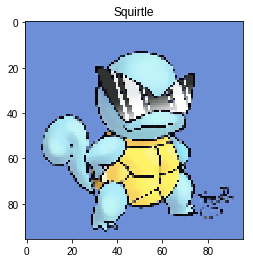

In [14]:
a = np.random.np.random.randint(1428)
drawImg(X[0]/255.0 , y[0])

## Adding datasets directly from Kaggle

In [0]:

!pip install kaggle


In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hchauhan97","key":"4bb7c5244f0ef28b24a6acd6d881408e"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [0]:
!kaggle datasets download -d thedagger/pokemon-generation-one

 98% 1.06G/1.08G [00:28<00:00, 41.1MB/s]
100% 1.08G/1.08G [00:28<00:00, 40.8MB/s]


In [0]:
!ls

gdrive	kaggle.json  Pokemon-Dataset  pokemon-generation-one.zip  sample_data


In [0]:
pokemon = ['Pikachu', 'Squitle', 'Mewtwo','Onix','Charmander','Bublbasaur','Psyduck','Spearow','Poliwhirl','Arcanine']

!unzip pokemon-generation-one.zip

In [0]:
!ls


dataset  kaggle.json  Pokemon-Dataset		  sample_data
gdrive	 __MACOSX     pokemon-generation-one.zip


In [0]:
!ls dataset

Abra	    Ditto	Goldeen     Koffing    Nidoran♀   Primeape   Tangela
Aerodactyl  Dodrio	Golduck     Krabby     Nidoran♂   Psyduck    Tauros
Alakazam    Doduo	Golem	    Lapras     Nidorina   Raichu     Tentacool
Arbok	    Dragonair	Graveler    Lickitung  Nidorino   Rapidash   Tentacruel
Arcanine    Dragonite	Grimer	    Machamp    Ninetales  Raticate   Vaporeon
Articuno    Dratini	Growlithe   Machoke    Oddish	  Rattata    Venomoth
Beedrill    Drowzee	Gyarados    Machop     Omanyte	  Rhydon     Venonat
Bellsprout  Dugtrio	Haunter     Magikarp   Omastar	  Rhyhorn    Venusaur
Blastoise   Eevee	Hitmonchan  Magmar     Onix	  Sandshrew  Victreebel
Bulbasaur   Ekans	Hitmonlee   Magnemite  Paras	  Sandslash  Vileplume
Butterfree  Electabuzz	Horsea	    Magneton   Parasect   Scyther    Voltorb
Caterpie    Electrode	Hypno	    Mankey     Persian	  Seadra     Vulpix
Chansey     Exeggcute	Ivysaur     Marowak    Pidgeot	  Seaking    Wartortle
Charizard   Exeggutor	Jigglypuff  Meowth     Pidgeotto  Seel

## Preprocessing

In [0]:
X /= 255.0

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 42 , shuffle = True)

In [18]:
X_train.shape , y_train.shape

((1141, 96, 96, 3), (1141,))

In [19]:
X_test.shape

(286, 96, 96, 3)

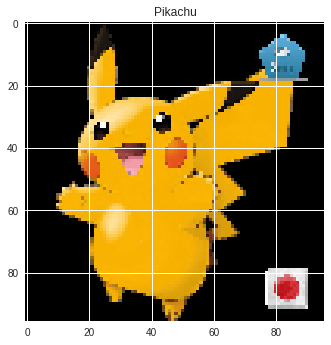

In [20]:
drawImg(X_train[4],y_train[4])

In [0]:
from keras import Sequential
from keras.layers import *
from keras.utils import to_categorical

In [0]:

Y_train_one_hot = to_categorical(y_train)
Y_test_one_hot = to_categorical(y_test)

In [0]:
Input_shape = (96 , 96 , 3)

## Model basic CNN

In [0]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=Input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [0]:
model1 = createModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 94, 94, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 47, 47, 64)        18496     
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 45, 45, 64)        36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 22, 22, 64)        0         
__________

### Training and Testing

In [0]:
from keras import optimizers
model1.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

hist = model1.fit(X_train , Y_train_one_hot,batch_size = 256 , epochs = 20 , verbose = 1,
                validation_data = (X_test , Y_test_one_hot))
score = model1.evaluate(X_test, Y_test_one_hot, verbose=0)

Train on 1141 samples, validate on 286 samples
Epoch 1/20
1141/1141 [==============================] - 4s 3ms/step - loss: 2.2754 - acc: 0.1297 - val_loss: 2.1971 - val_acc: 0.1329
Epoch 2/20
1141/1141 [==============================] - 2s 1ms/step - loss: 2.1839 - acc: 0.1499 - val_loss: 2.0440 - val_acc: 0.3112
Epoch 3/20
1141/1141 [==============================] - 2s 1ms/step - loss: 2.0050 - acc: 0.2656 - val_loss: 1.8698 - val_acc: 0.3042
Epoch 4/20
1141/1141 [==============================] - 2s 1ms/step - loss: 1.8301 - acc: 0.3295 - val_loss: 1.6822 - val_acc: 0.4091
Epoch 5/20
1141/1141 [==============================] - 2s 1ms/step - loss: 1.7342 - acc: 0.3506 - val_loss: 1.5981 - val_acc: 0.4476
Epoch 6/20
1141/1141 [==============================] - 2s 1ms/step - loss: 1.6354 - acc: 0.4207 - val_loss: 1.5339 - val_acc: 0.4406
Epoch 7/20
1141/1141 [==============================] - 2s 1ms/step - loss: 1.5949 - acc: 0.4216 - val_loss: 1.4791 - val_acc: 0.5455
Epoch 8/20
1141

### PLotting the curve

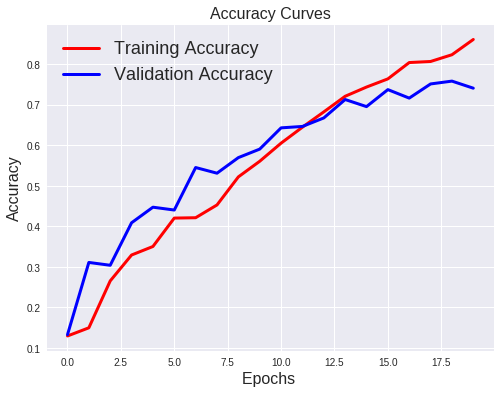

In [0]:
plt.figure(figsize=[8,6])
plt.plot(hist.history['acc'],'r',linewidth=3.0)
plt.plot(hist.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

## Additional Preprocessing using ImageDataGenerator

In [25]:
from keras.preprocessing.image import ImageDataGenerator
model2 = createModel()
model2.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

datagen = ImageDataGenerator(
rotation_range=25, 
width_shift_range=0.1,
height_shift_range=0.1, 
shear_range=0.2, 
zoom_range=0.2,
horizontal_flip=True, 
fill_mode="nearest"
)
history2 = model2.fit_generator(datagen.flow(X_train, Y_train_one_hot, batch_size=32),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(32))),
                              epochs=32,
                              validation_data=(X_test, Y_test_one_hot),
                              workers=4)

model2.evaluate(X_test, Y_test_one_hot)

W0718 17:33:05.382173 139914305898368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 17:33:05.423543 139914305898368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 17:33:05.437595 139914305898368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 17:33:05.476836 139914305898368 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0718 17:33:05.481736 139914305898368 deprecation_wrapp

Epoch 1/32
36/36 [==============================] - 9s 260ms/step - loss: 2.1482 - acc: 0.1872 - val_loss: 1.9487 - val_acc: 0.2902
Epoch 2/32
36/36 [==============================] - 2s 50ms/step - loss: 1.9315 - acc: 0.2779 - val_loss: 1.8137 - val_acc: 0.3182
Epoch 3/32
36/36 [==============================] - 2s 57ms/step - loss: 1.7522 - acc: 0.3673 - val_loss: 1.5608 - val_acc: 0.4336
Epoch 4/32
36/36 [==============================] - 2s 58ms/step - loss: 1.6103 - acc: 0.4295 - val_loss: 1.4656 - val_acc: 0.4510
Epoch 5/32
36/36 [==============================] - 2s 59ms/step - loss: 1.5202 - acc: 0.4676 - val_loss: 1.4847 - val_acc: 0.5000
Epoch 6/32
36/36 [==============================] - 2s 62ms/step - loss: 1.3871 - acc: 0.4985 - val_loss: 1.2404 - val_acc: 0.5385
Epoch 7/32
36/36 [==============================] - 2s 58ms/step - loss: 1.2779 - acc: 0.5436 - val_loss: 1.2129 - val_acc: 0.5909
Epoch 8/32
36/36 [==============================] - 2s 58ms/step - loss: 1.1936 - 

[0.501987142371131, 0.8496503504839811]

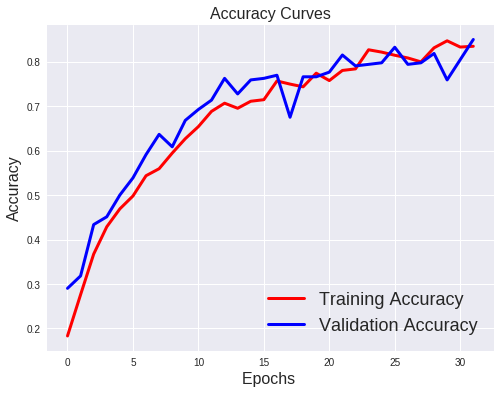

In [26]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

## A more complex model -
### Batch Normalization
### Dropouts

In [0]:
def newModel():
  classifier = Sequential()
  classifier.add(Conv2D(32,(3,3),padding ='same',input_shape = Input_shape))
  classifier.add(Activation("relu"))
  classifier.add(BatchNormalization(axis = -1))
  classifier.add(MaxPooling2D(pool_size=(3,3)))
  classifier.add(Dropout(0.25))
  
  classifier.add(Conv2D(64, (3, 3), padding="same",input_shape=Input_shape))
  classifier.add(Activation("relu"))
  classifier.add(BatchNormalization(axis=-1))
  classifier.add(Conv2D(64, (3, 3), padding="same",input_shape=Input_shape))
  classifier.add(Activation("relu"))
  classifier.add(BatchNormalization(axis=-1))
  classifier.add(MaxPooling2D(pool_size=(2, 2)))
  classifier.add(Dropout(0.25))
  
  classifier.add(Conv2D(128, (3, 3), padding="same" , input_shape=Input_shape))
  classifier.add(Activation("relu"))
  classifier.add(BatchNormalization(axis=-1))
  classifier.add(Conv2D(128, (3, 3), padding="same",input_shape=Input_shape))
  classifier.add(Activation("relu"))
  classifier.add(BatchNormalization(axis=-1))
  classifier.add(MaxPooling2D(pool_size=(2, 2)))
  classifier.add(Dropout(0.25))
  
  classifier.add(Flatten())
  classifier.add(Dense(1024))
  classifier.add(Activation("relu"))
  classifier.add(BatchNormalization())
  classifier.add(Dropout(0.5))
        
        # softmax classifier
  classifier.add(Dense(10))
  classifier.add(Activation("softmax"))
        
        # return the constructed network architecture
  return classifier

In [0]:
model2 = newModel()
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 96, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 64)        0         
__________

In [0]:
model2.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

hist_vgg = model2.fit(X_train , Y_train_one_hot,batch_size = 32 , epochs = 20 , verbose = 1,
                validation_data = (X_test , Y_test_one_hot))
score = model2.evaluate(X_test, Y_test_one_hot, verbose=0)

W0712 05:50:56.730370 139788956845952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 05:50:56.891358 139788956845952 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1141 samples, validate on 286 samples
Epoch 1/20
1141/1141 [==============================] - 7s 6ms/step - loss: 2.0191 - acc: 0.4522 - val_loss: 1.7092 - val_acc: 0.5804
Epoch 2/20
1141/1141 [==============================] - 2s 2ms/step - loss: 1.0096 - acc: 0.7038 - val_loss: 3.1444 - val_acc: 0.4510
Epoch 3/20
1141/1141 [==============================] - 2s 2ms/step - loss: 0.8136 - acc: 0.7581 - val_loss: 1.2087 - val_acc: 0.6993
Epoch 4/20
1141/1141 [==============================] - 2s 2ms/step - loss: 0.7427 - acc: 0.7555 - val_loss: 1.0991 - val_acc: 0.7343
Epoch 5/20
1141/1141 [==============================] - 2s 2ms/step - loss: 0.6408 - acc: 0.8037 - val_loss: 1.5946 - val_acc: 0.6573
Epoch 6/20
1141/1141 [==============================] - 2s 2ms/step - loss: 0.5173 - acc: 0.8344 - val_loss: 0.9845 - val_acc: 0.7483
Epoch 7/20
1141/1141 [==============================] - 2s 2ms/step - loss: 0.4308 - acc: 0.8580 - val_loss: 1.6668 - val_acc: 0.6678
Epoch 8/20
1141

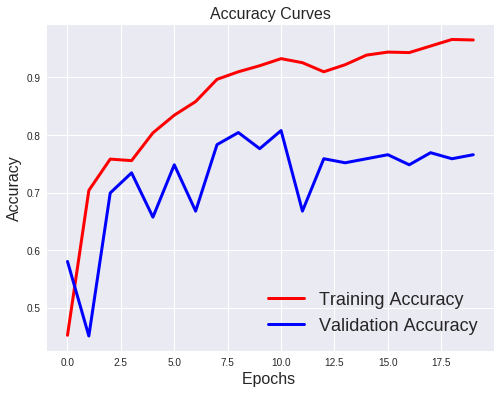

In [0]:
plt.figure(figsize=[8,6])
plt.plot(hist_vgg.history['acc'],'r',linewidth=3.0)
plt.plot(hist_vgg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

###Clearly the model is overfitting as the complex model will help us attain better accuracy on training set but will only be limited by the training data thus leading to bigger difference in training and validation accuracy.

## Complex model with ImageDatagenerator

In [0]:
from keras.preprocessing.image import ImageDataGenerator

model3 = newModel()
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
datagen = ImageDataGenerator(
rotation_range=25, 
width_shift_range=0.1,
height_shift_range=0.1, 
shear_range=0.2, 
zoom_range=0.2,
horizontal_flip=True, 
fill_mode="nearest"
)
history3 = model3.fit_generator(datagen.flow(X_train, Y_train_one_hot, batch_size=32),
                              steps_per_epoch=int(np.ceil(X_train.shape[0] / float(32))),
                              epochs=32,
                              validation_data=(X_test, Y_test_one_hot),
                              validation_steps = 32,
                              workers=4)

model3.evaluate(X_test, Y_test_one_hot)

Epoch 1/32
36/36 [==============================] - 6s 164ms/step - loss: 2.3590 - acc: 0.4021 - val_loss: 2.0892 - val_acc: 0.5664
Epoch 2/32
36/36 [==============================] - 3s 81ms/step - loss: 1.4543 - acc: 0.5797 - val_loss: 1.7771 - val_acc: 0.5979
Epoch 3/32
36/36 [==============================] - 3s 89ms/step - loss: 1.3263 - acc: 0.5975 - val_loss: 2.3114 - val_acc: 0.5140
Epoch 4/32
36/36 [==============================] - 3s 89ms/step - loss: 1.2546 - acc: 0.6274 - val_loss: 1.5872 - val_acc: 0.6154
Epoch 5/32
36/36 [==============================] - 3s 88ms/step - loss: 1.2910 - acc: 0.6257 - val_loss: 1.2619 - val_acc: 0.6643
Epoch 6/32
36/36 [==============================] - 3s 86ms/step - loss: 1.0731 - acc: 0.6691 - val_loss: 1.6352 - val_acc: 0.6119
Epoch 7/32
36/36 [==============================] - 3s 87ms/step - loss: 0.9150 - acc: 0.7186 - val_loss: 1.1973 - val_acc: 0.7028
Epoch 8/32
36/36 [==============================] - 3s 89ms/step - loss: 0.9577 - 

[0.7531381716261377, 0.8356643339970729]

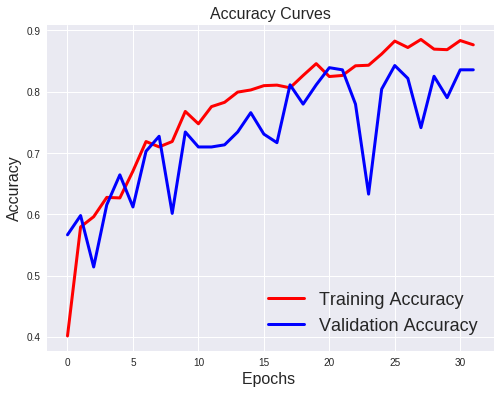

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['acc'],'r',linewidth=3.0)
plt.plot(history3.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

### After increasing the number of images with Image Augumentation we can witness somewhat better results. 
And as we use more consistent dataset with sufficient data for each label model  the model accuracy will improve gradually!

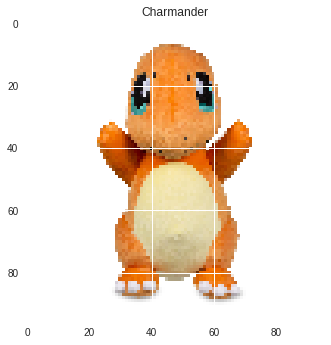

In [0]:
a =np.random.randint(286)
b = model3.predict_classes(X_test[a].reshape((-1,96,96,3)))

drawImg(X_test[a],b[0])

4